## 7- Step Process:
- Data Cleaning
- EDA
- Text Preprocessing
- Model Building
- Evaluation
- Improvement
- Deployment

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("spam.csv", encoding='latin1')

In [5]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data.shape


(5572, 5)

# Data Cleaning

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
data.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [9]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.sample(5)

,v1,v2
2054,ham,Y so late but i need to go n get da laptop...
1408,ham,"I've got ten bucks, jay is being noncomittal"
4903,ham,"no, i *didn't* mean to post it. I wrote it, an..."
2121,ham,In xam hall boy asked girl Tell me the startin...
4630,ham,"Got hella gas money, want to go on a grand nat..."


In [11]:
#Renaming Columns

data.rename(columns = {'v1' : 'Target', 'v2' : 'Text' }, inplace = True)

In [12]:
data.sample(5)

,Target,Text
5267,ham,Anything lar then Ì_ not going home 4 dinner?
3493,spam,You are being contacted by our dating service ...
1506,spam,Thanks for the Vote. Now sing along with the s...
1536,ham,How's it feel? Mr. Your not my real Valentine ...
2026,ham,"Nah man, my car is meant to be crammed full of..."


In [13]:
data.head(5)

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
data['Target'] = encoder.fit_transform(data['Target'])

In [17]:
data.head(10)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [18]:
#Missing Values

data.isnull().sum()

Target    0
Text      0
dtype: int64

In [19]:
#Check for duplicacies

data.duplicated().sum()

403

In [20]:
#Remove Duplicates

data = data.drop_duplicates(keep = 'first')


In [21]:
data.duplicated().sum()

0

In [22]:
data.shape

(5169, 2)

### EDA

In [23]:
data['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [31]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [32]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


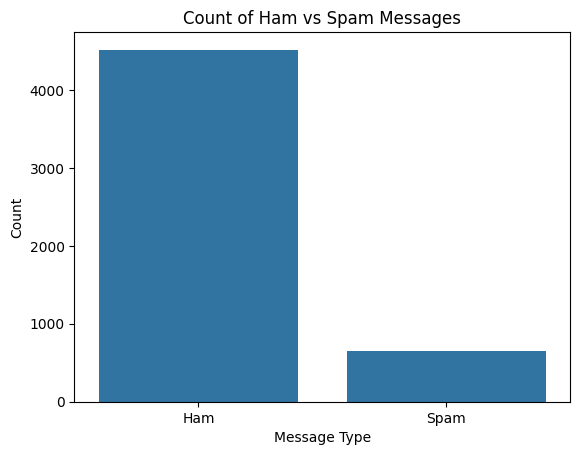

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Target', data=data)
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Count of Ham vs Spam Messages')
plt.show()

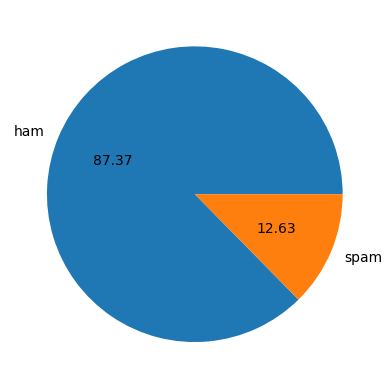

In [33]:
import matplotlib.pyplot as plt
plt.pie(data['Target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

# Insight: Data is Imbalanced. Spam very less

Next we go for analysis of how many alphabets, words and sentences that are used in the SMSs

In [24]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nathb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Now we will create few columns for deeper analysis. The first column will be number of characters in the sms, 2nd the no of words in the sms, 3rd the no of sentences in the sms. That we will do with the help of Nltk library.

How do we calculate characters

In [27]:
data['Characters'] = data['Text'].apply(len)

In [28]:
data.head(5)

,Target,Text,Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


Now we find the number of words per sms, this will be done using NLTK library

In [29]:
#number of words
data['Text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

So now we have the list of words per sms. All we need to do is induce the "len" function in the code above

In [30]:
#length of words per sms
data['Text'].apply(lambda x: len(nltk.word_tokenize(x)))


0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Text, Length: 5169, dtype: int64

In [31]:
#Creating the second column
data["sms_length"] = data['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [32]:
data.head()

,Target,Text,Characters,sms_length
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


Now we need to add no of sentences. We will use the same code but in nltk we will use sent tokenize

In [33]:
data['Text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

So here we are tokenizing the content based on the sentences basically dividing them into small parts. Here we want the length of no of sentences 

In [34]:
data["num_sentences"] = data['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [35]:
data.head()

,Target,Text,Characters,sms_length,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


Now that we have created new columns from our already existing features, now I need to see the statistical measuers which I will be doing it using "describe" fucntion

In [36]:
data.loc[:,data.columns != 'Target'].describe()

,Characters,sms_length,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


Here we can see that theres one sms where the max no of characters is 910 whereas the longest sms in terms of number of words is 220 and also the max no fo sentences in a single sms is 38. Also mean of characters in each msg is almost 79, i.e there are atleast 79 characters in each msg. Whereas there are 18 words in each msg also each msg contains 2 sentences at the minimum.  

We can check the description of spam and ham messages distinctively with the code below, 0 for Ham msgs and 1 for Spam msgs

In [37]:
data.loc[:, data.columns != 'Target'][data['Target'] == 0 ].describe()

,Characters,sms_length,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


Here we can see the same stats for ham msgs.

Lets do the same for Spam msgs. i.e. Target will be '1'

In [38]:
data.loc[:, data.columns != 'Target'][data['Target'] == 1 ].describe()

,Characters,sms_length,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


We can check the same stats for max, min and mean based on characters, sms length and num sentences

Now we will check the histograms with the help of seaborn


In [39]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='Characters', ylabel='Count'>

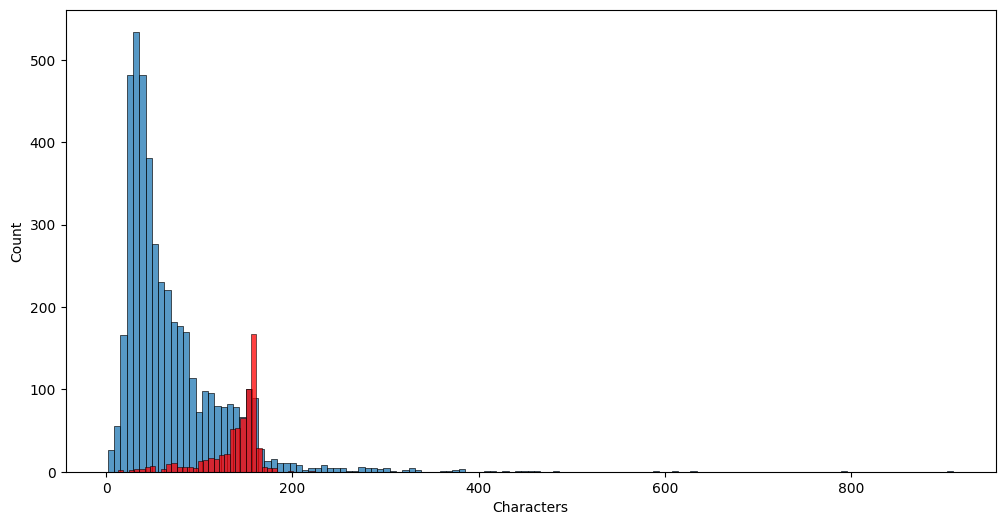

In [40]:
import seaborn as sns
plt.figure(figsize = (12,6) )
sns.histplot(data[data['Target'] == 0]['Characters']) 
sns.histplot(data[data['Target'] == 1]['Characters'], color= 'red') 


Insights :  Here on an average the no of characters used in ham (Target = 0 ) messages is less than the no of characters used in spam (Target =0) messgaes

Now lets do the same for sms length based on words


<Axes: xlabel='sms_length', ylabel='Count'>

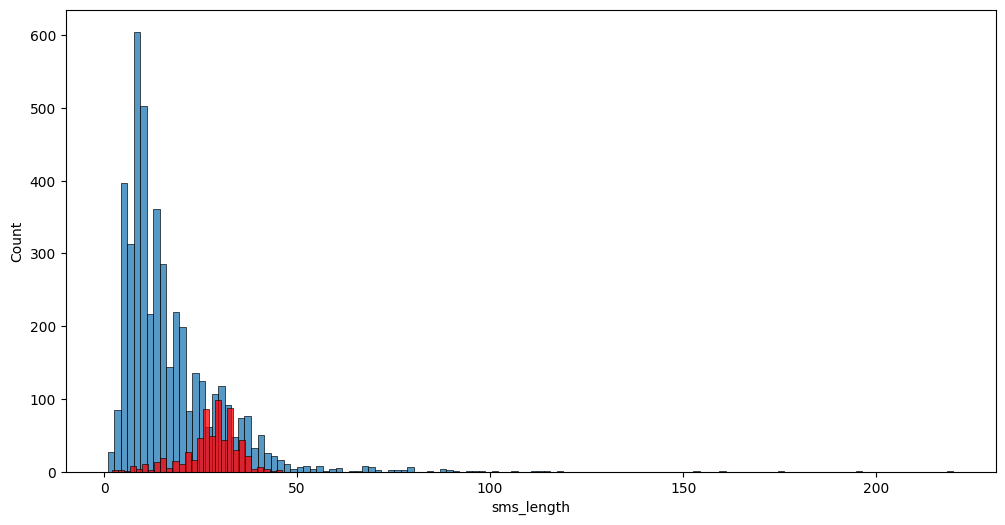

In [41]:
plt.figure(figsize = (12,6) )
sns.histplot(data[data['Target'] == 0]['sms_length']) 
sns.histplot(data[data['Target'] == 1]['sms_length'], color= 'red') 

we can see that No of words per msg in ham have lower words than in spam msgs. There are outliers in the data that can disturb our analysis. Lets do a pairplot

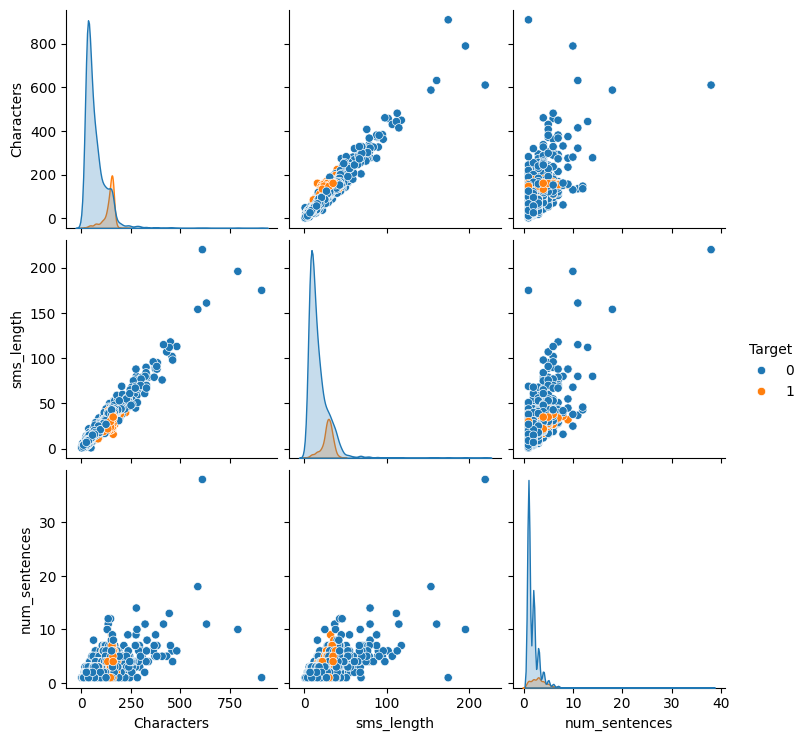

In [42]:
sns.pairplot(data, hue ='Target')

There are outliers in the data that can be clearly understood from the data

Now we can do a correlation coefficient

<Axes: >

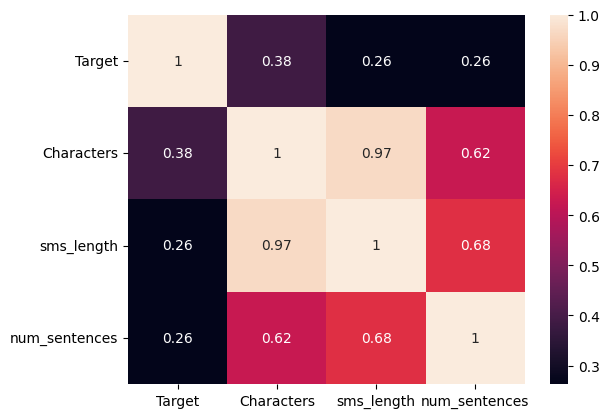

In [43]:
sns.heatmap(data.drop(columns=['Text']).corr(), annot = True)

Target and characters has a correlation of 0.38 which means as the no of characters increases the tendency of it being a spam increases.  If we talk about the other columns, no of sentences and characters has a high corealtion i.e. 0.62 while with sms_length or no of words has even higher correlation, i.e. 068, and also correlation between charcters and sms length is 0.97, which suggests that there is multicolinearity. This means if we wan tot make a model we will only take on feature out of the three. In our case it will be characters which is 0.38 with the Target column.  We cant keep the 3 because there is high correlation between the three columns 

# Text preprocessing

Steps: 
1. Lower Case
2. Tokenization : we break the sentences into words
3. Removing special characters
4. Removing stop words and punctuation : Stop words such as "is", "of", "the", words that help us build  asentence but doesnt hold much significance
5. Stemming : Say we have the same type of wprds such as swim, swimming and swam, we will convert this words to swim becasue they all mean swim, 

We will create a function that will do all these steps in a single call



To see stop words we need to import stopwords from nltk corpus. We can see the words that are tagged as stop words


In [44]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

To view punctuatuion marks


In [45]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

For stemming


In [46]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [47]:
def transform_txt (text):
    text = text.lower()
    text= nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y [:] #cloning
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join (y)

In [48]:
transform_txt("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [49]:
data['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

Now we will make  anew column by the name 'Transformed_text' where we will store the transforamtions or the text preprocessing

In [50]:
data['Transformed_txt'] = data ['Text'].apply(transform_txt)

In [51]:
data.head()

,Target,Text,Characters,sms_length,num_sentences,Transformed_txt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Now we will use word cloud for hams and spams to highlight the most used words. The most used words will be highlighed with bigger fonts. We will use Wordcloud library for that.

In [52]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [53]:
from wordcloud import WordCloud

In [54]:
wc = WordCloud(width = 500, height =500, min_font_size =10, background_color= 'white')

Word Cloud for Spam

In [55]:
spam_wc = wc.generate(data[data['Target'] == 1]['Transformed_txt'].str.cat(sep = " "))

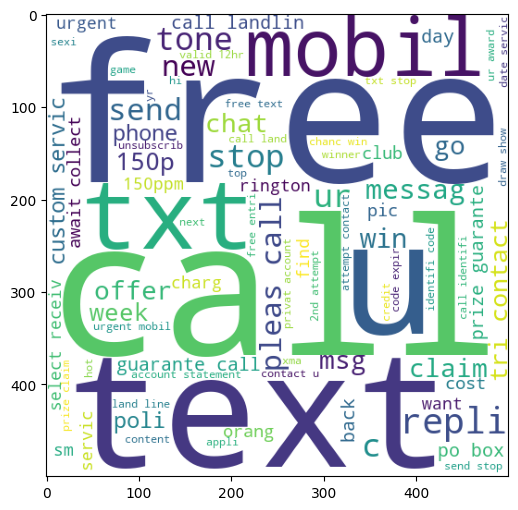

In [56]:
plt.figure(figsize =(12,6))
plt.imshow(spam_wc)

Word Cloud for Ham

In [57]:
ham_wc = wc.generate(data[data['Target'] == 0]['Transformed_txt'].str.cat(sep = " "))

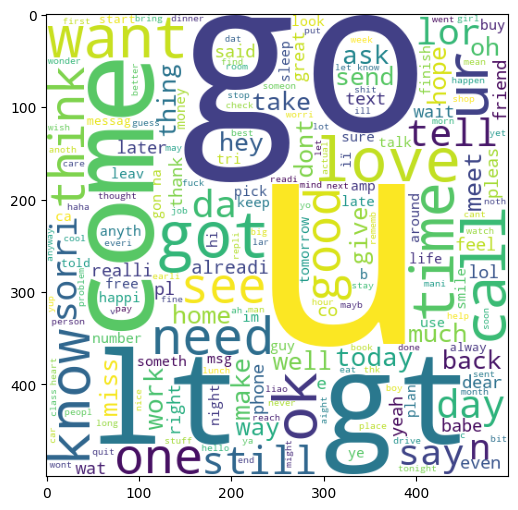

In [58]:
plt.figure(figsize =(12,6))
plt.imshow(spam_wc)

Now we will check out the top 30 words that are being used in spam and ham respectively


In [59]:
data.head()

,Target,Text,Characters,sms_length,num_sentences,Transformed_txt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# For Spam

Now we convert the series 'transformed_txt' into a list of strings so that in the list, each msg is an item.

In [60]:
data[data['Target'] == 1]['Transformed_txt'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

Now we use for loop to print all the messages

In [61]:
for msg in data[data['Target'] == 1]['Transformed_txt'].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

Here we have used spam_corpus as an empty list where we save the splitted msgs. After that we see the length of th espam messages which is around 10k words in total.

In [62]:
spam_corpus = []
for msg in data[data['Target'] == 1]['Transformed_txt'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [63]:
len(spam_corpus)

9939

Now we import a library named collections and a class named Counter. This will create a dictionary

In [64]:
from collections import Counter

Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [65]:
Counter(spam_corpus).most_common(30) #The top 30 used words in Spam

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

Now we will convert this into a dataframe and also use seaborn to plot bar graph

In this line of code, Counter(spam_corpus).most_common(30) is counting the frequency of words in the spam_corpus and then picking the top 30 most common words.

When this is converted into a DataFrame using pd.DataFrame(), it creates a table where the first column (column with index 0) contains the words, and the second column (column with index 1) contains the corresponding counts of those words.

So, when you see [0] and [1], they are simply selecting the first and second columns of the DataFrame respectively. In layman’s terms:

[0] is used to select the words from the DataFrame.
[1] is used to select the counts of those words from the DataFrame.
The sns.barplot() function then creates a bar plot where the x-axis represents the words and the y-axis represents the counts of those words.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

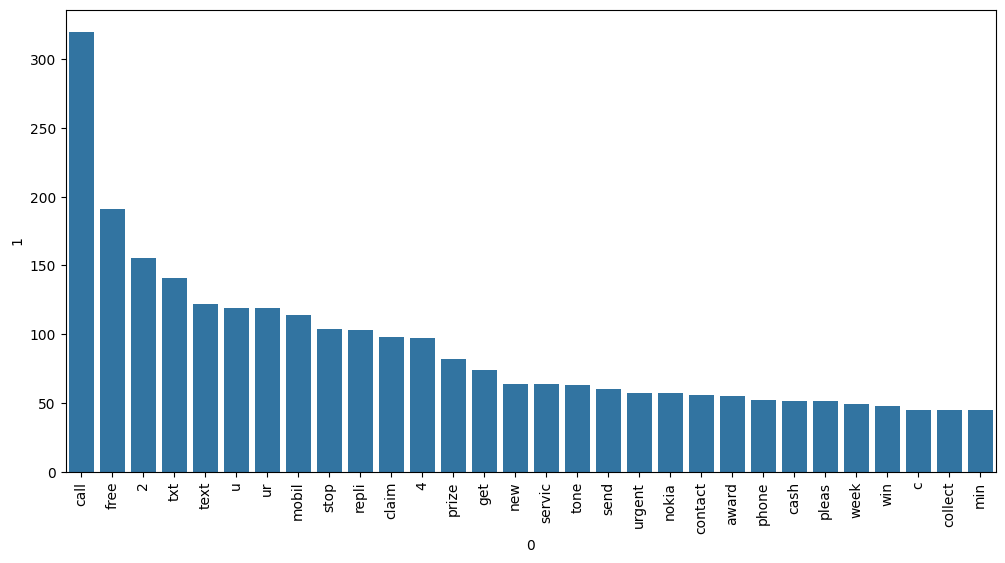

In [66]:
plt.figure(figsize =(12,6))
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1]) #The top 30 used words in Spam
plt.xticks(rotation = 'vertical')

# For HAM

In [67]:
ham_corpus = []
for msg in data[data['Target'] == 0]['Transformed_txt'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [68]:
len(ham_corpus)

35404

Since we have more number of ham msgs so more no of words in ham

In [69]:
Counter(ham_corpus)

Counter({'u': 883,
         'go': 404,
         'get': 349,
         'gt': 288,
         'lt': 287,
         '2': 284,
         'come': 275,
         'got': 236,
         'know': 236,
         'like': 234,
         'call': 233,
         'time': 219,
         'ok': 217,
         'love': 216,
         'good': 213,
         'want': 208,
         'ur': 197,
         'day': 190,
         'need': 170,
         'one': 165,
         'lor': 159,
         '4': 156,
         'home': 152,
         'think': 149,
         'see': 147,
         'take': 143,
         'still': 143,
         'da': 142,
         'tell': 133,
         'make': 129,
         'say': 127,
         'back': 127,
         'today': 123,
         'hope': 122,
         'ask': 121,
         'sorri': 121,
         'n': 120,
         'send': 120,
         'r': 120,
         'work': 118,
         'dont': 118,
         'meet': 112,
         'hi': 111,
         'well': 109,
         'thing': 109,
         'wat': 108,
         'k': 107,
  

In [70]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

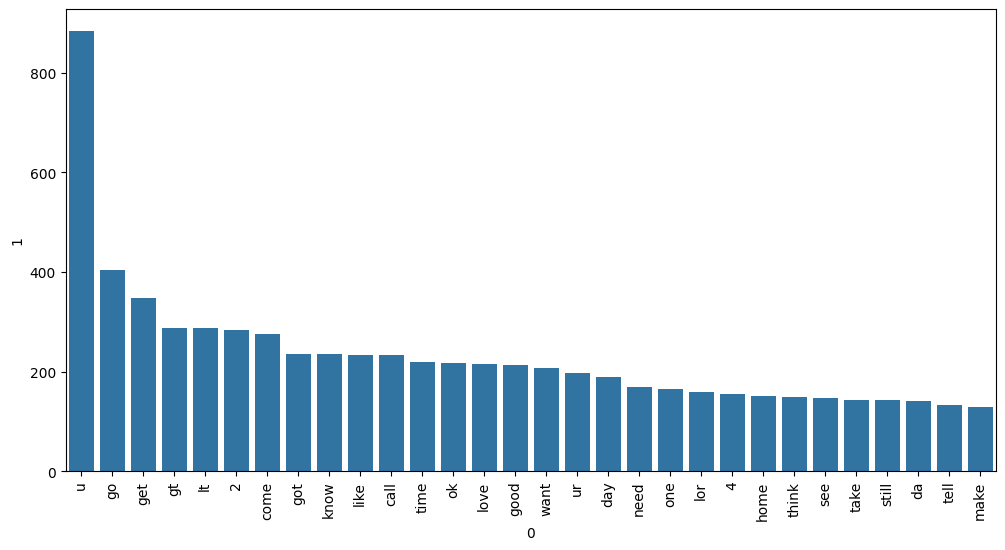

In [71]:
plt.figure(figsize =(12,6))
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1]) #The top 30 used words in Spam
plt.xticks(rotation = 'vertical')

# Model Building : Naive Bayes, works best on textual data

For Naive bayes we need numerical data. So what do we have? The target is already a numerical data whereas the transformed_txt is not numerical. Here the text should be converted to numbers or vectors. so we will be doing text vectorization. There are few methods:
- Bag of words : Here we will be making a column of the most frequent words and then we will check the count of frequent words per sms. The numbers that come in become the vectors
- TFIDF : TF-IDF (Term Frequency-Inverse Document Frequency): This method not only counts the occurrence of words in a document (like Bag of Words) but also takes into account how often the word appears in the entire corpus of documents. Words that are common across all documents are given less importance, while unique words are given more importance
- Word2Vec : This method uses a neural network to learn word associations from a large corpus of text. Instead of counting occurrences, it predicts context words for a given target word. As a result, words with similar meanings or used in similar contexts end up having similar vector representations, capturing semantic and syntactic relationships.

we will be using Bag of words and then feed it into Naive Bayes

In [72]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()

In [73]:
X = cv.fit_transform(data['Transformed_txt']).toarray()

In [74]:
X.shape

(5169, 6708)

5169 sms and 6708 words

In [75]:
y = data['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=2)

In [77]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [78]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [79]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


GNB doesnt work good, Precision score is very bad

In [80]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [81]:
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


Bernoulli doing good out of all

# Lets try Tfidf


In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [101]:
X = tfidf.fit_transform(data['Transformed_txt']).toarray()

In [102]:
X.shape

(5169, 6708)

In [103]:
y = data['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=2)

In [105]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [106]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [107]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [108]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


Multinomial NB gives better precision although less accuracy

In [110]:
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


MNB with TFIDF : 
since precision makes more sense in this case, we will go with multinomial naive bayes. As the data is imbalanced, in such a case accuracy wont be the proper metric, thus we go for the better precision score and in that case, multinomial naive bayes wins.

# Ensemble Techniques

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [112]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

Making the objects of all the algos and also applied minimum changes in the hyperparameter tuning according to the requirement and understanding

In [113]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

Made a dictionary where (Algo name) : (Objects)

Lets make a function where we will be naming it as train_classifier where we are applying the train and test data. Here the classifier is getting trained on the training data, then we are getting the accuracy and precision. We are using the example in the first case based on the SVC Classifier

In [114]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

example

In [115]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

Now we are going in for a loop on the clf dictionary. Basically we are training each algorithm on the training data and storing the precision and accuracy of each classifier.

In [116]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0


c:\Users\nathb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


This is converted into a dataframe so we can check the accuracy and precision. The list is sorted on Precision

In [117]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


Naive Bayes is still performing best in terms of precision and accuracy both

In [130]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,xgb,Accuracy,0.972921
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


The melt function in pandas is used to transform or reshape a DataFrame from a wide format to a long format. It’s a way to ‘unpivot’ data, turning columns into rows.

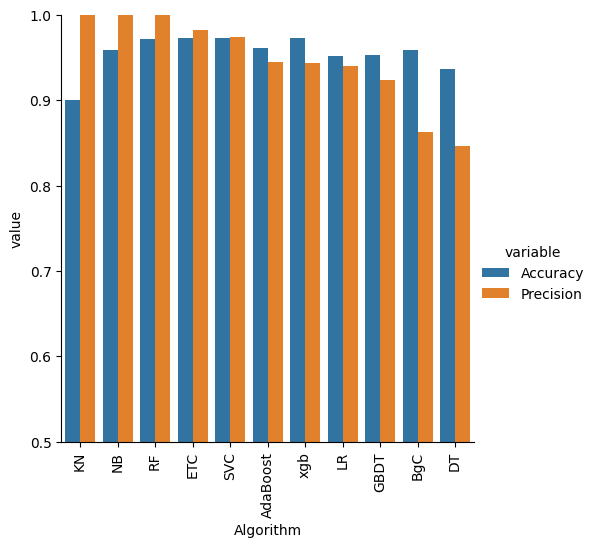

In [122]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Model Improvement

Change the hidden feature i .e max_features parameter of Tfidf, we have a total of 6k unique words. Now we will be taking 3k words which is in the entire corpus we have taken the top 3k words, i.e. max_features = 3000, but this is experimented, I have sued 1k, 2k and 3k, and 3k gives the best results. But before this we didnt take any max_features param. So you need to first do it without any parameter set, then do it with the max_features thing in model development.

The accuracy and precisions that are now stored with the max_features being the paramter is now appended in the old df with the old results.

In [124]:
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(data['Transformed_txt']).toarray()
y = data['Target'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=2)

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932
0.9709864603481625
[[896   0]
 [ 30 108]]
1.0
0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [126]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [127]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


c:\Users\nathb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [129]:
max_param = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
max_param

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [133]:
combined_df = combined_df = pd.concat([performance_df, max_param.drop('Algorithm', axis=1)], axis=1)
combined_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.900387,1.000000,0.905222,1.000000
2,NB,0.959381,1.000000,0.970986,1.000000
5,RF,0.971954,1.000000,0.975822,0.982906
8,ETC,0.972921,0.982456,0.974855,0.974576
0,SVC,0.972921,0.974138,0.975822,0.974790
6,AdaBoost,0.961315,0.945455,0.960348,0.929204
10,xgb,0.972921,0.943548,0.967118,0.926230
4,LR,0.951644,0.940000,0.958414,0.970297
9,GBDT,0.952611,0.923810,0.946809,0.919192
7,BgC,0.958414,0.862595,0.958414,0.868217


Here I have appended the performance_df that contains the first set of accuracy and precision scores. I appeneded the scores of normal tfidf to the max parameters tfidf. There isnt much change here though. One significant change is NB where the accuracy has slightly increased.

From here we can see that the most efficient and performance reliable algo is Naive Bayes yet


# Now lets scale the features of X and modify the model for furtehr improvements if any

In [137]:
X.shape

(5169, 3000)

In [138]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

No performing standard scaler because it will bring in negative values and as such Naive Bayes wont accept

In [139]:
y = data['Target'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=2)

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128
0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461
0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [141]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [142]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9690522243713733
Precision -  0.9274193548387096
For  KN
Accuracy -  0.9052224371373307
Precision -  0.9761904761904762
For  NB
Accuracy -  0.9787234042553191
Precision -  0.9461538461538461
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9671179883945842
Precision -  0.9642857142857143
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


c:\Users\nathb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [143]:
scaled_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
scaled_df

,Algorithm,Accuracy_scaling,Precision_scaling
5,RF,0.975822,0.982906
1,KN,0.905222,0.976190
8,ETC,0.974855,0.974576
4,LR,0.967118,0.964286
2,NB,0.978723,0.946154
6,AdaBoost,0.960348,0.929204
0,SVC,0.969052,0.927419
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [146]:
new_df = combined_df.merge(scaled_df, on = 'Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
6,xgb,0.972921,0.943548,0.967118,0.926230,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
8,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217


Here in Naive Bayes, the accuracy though has increased but the precision has decreased. Also in the top performing algos, there aren't any significant changes. Thsu for this reason I will not be opting this scaling parameter in our process.

# Adding the additionally created features
As we created 3 features (columns) at the beginning, we will add the Characters column to the process and see if the model improves

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['Transformed_txt']).toarray()
X = np.hstack((X,data['Characters'].values.reshape(-1,1)))

np.hstack((X,data['Characters'].values.reshape(1,-1))) is horizontally stacking the X array and the reshaped data['Characters'] array. The reshape(1,-1) function is reshaping the data['Characters'] array into a 2-D array with one row and as many columns as necessary (indicated by -1). The reshaped array is then horizontally stacked with the X array. 

In [150]:
y = data['Target'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=2)

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.8945841392649904
[[806  90]
 [ 19 119]]
0.569377990430622
0.867504835589942
[[896   0]
 [137   1]]
1.0
0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [152]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [153]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

c:\Users\nathb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KN
Accuracy -  0.9361702127659575
Precision -  0.8529411764705882
For  NB
Accuracy -  0.867504835589942
Precision -  1.0
For  DT
Accuracy -  0.9497098646034816
Precision -  0.8771929824561403
For  LR
Accuracy -  0.9593810444874274
Precision -  0.9528301886792453
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9912280701754386


c:\Users\nathb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9243697478991597
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.896
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9516441005802708
Precision -  0.9313725490196079
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9338842975206612


In [159]:
Char_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_chars':accuracy_scores,'Precision_chars':precision_scores}).sort_values('Precision_chars',ascending=False)
Char_df

,Algorithm,Accuracy_chars,Precision_chars
2,NB,0.867505,1.000000
5,RF,0.974855,0.991228
8,ETC,0.974855,0.974576
4,LR,0.959381,0.952830
10,xgb,0.968085,0.933884
9,GBDT,0.951644,0.931373
6,AdaBoost,0.964217,0.924370
7,BgC,0.962282,0.896000
3,DT,0.949710,0.877193
1,KN,0.936170,0.852941


In [161]:
final_df = new_df.merge(Char_df, on = 'Algorithm')
final_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_chars,Precision_chars
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.936170,0.852941
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154,0.867505,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906,0.974855,0.991228
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419,0.866538,0.000000
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204,0.964217,0.924370
6,xgb,0.972921,0.943548,0.967118,0.926230,0.967118,0.926230,0.968085,0.933884
7,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286,0.959381,0.952830
8,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192,0.951644,0.931373
9,BgC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217,0.962282,0.896000


We can see that after all that has been done, accuracy of naive bayes dropped significantly. And if we look over the three sets of accuracy and precision scores, we can see that the best performing set is the max_features param i.e. 3000 features wehre the combination of acc and precision of NB is the best

# Voting Classifier

Here we will use voting classifier. We will use the combination of best performing models. Lets see if this modification outperforms Naive Bayes

The goal: Precision should be 100 % and accuracy should be > 97%


In [165]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [166]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [167]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [168]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8684719535783365
Precision 1.0


In [171]:
from sklearn.ensemble import StackingClassifier


In [172]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [173]:

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [174]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9729206963249516
Precision 0.9365079365079365


# Conclusion

We have tried various methods and out of all, no model seems to work fine or have any significant changes in the results. Since our precision is a matter of concern, we will be choosing Multinomial Naive Bayes which had the best result.

Now since we have decided to take MNB, we will be creating a pipeline and we will convert that pipeline into a website

Say if we receive a new mail/ sms, it will undergo three main steps mainly: 
1. Preprocess with the help of the function that we created "transform_text" : Lemmatization
2. Vectorization
3. Apply algo

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

The `pickle` module in Python to serialize and save two objects, `tfidf` and `mnb`, to files. Here's a breakdown:

1. `import pickle`: This line imports the `pickle` module, which is a standard Python tool for object serialization.

2. `pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))`: This line is serializing the `tfidf` object and saving it to a file named 'vectorizer.pkl'. The `tfidf` object is likely a TF-IDF vectorizer, which is a tool used in natural language processing to convert text data into numerical vectors.

3. `pickle.dump(mnb,open('model.pkl','wb'))`: This line is serializing the `mnb` object and saving it to a file named 'model.pkl'. The `mnb` object is likely a model created with the Multinomial Naive Bayes algorithm, which is often used in text classification tasks in machine learning.

Serialization is the process of converting an object into a format that can be saved to a file or transferred over a network. The 'wb' mode is used because the serialized data needs to be written as a binary file.

These lines of code allow you to save these objects and load them later using `pickle.load()`, which can be very useful if the processes to create the `tfidf` and `mnb` objects are time-consuming and you want to reuse these objects in the future.